<h1 style='text-align:center;font-size:36px;color:#333;background-color:#f9f9f9;padding:10px;border-radius:5px;'> 🍄 Mushrooms 🍄: Quality food 😋 or Death ☠</h1>

# <center><div style="font-family: 'Roboto', sans-serif;"> 📚 Introduction  </div></center>

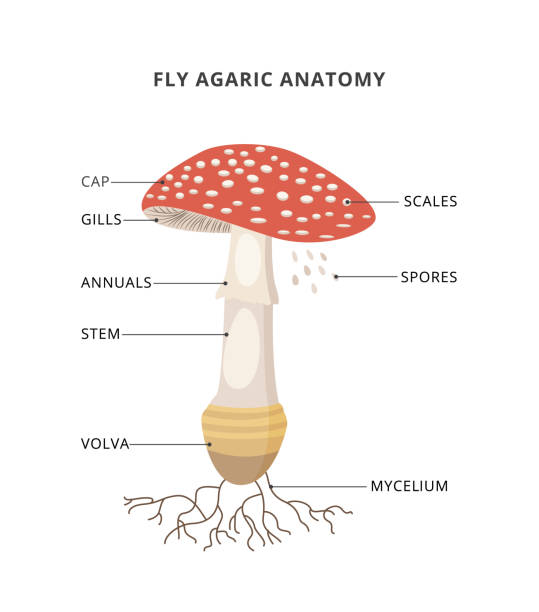

# The Dataset
A set of 8124 mushrooms described in terms of physical characteristics.
<br>Classification: poisonous or edible

## Brief feature descriptions:
The dataset contains information about these parts of mushrooms. <br>The number in parentheses indicates the cardinality of each feature:

>| Feature Category  | Details                                | Description                         |
|-----------|----------------------------------------|-------------------------------------|
| 1. Cap    | Shape(6), Surface(4), Color(10)       | Top part of the mushroom            |
| 2. Gills  | Attachment(2), Spacing(2), Size(2), Color(12) | Papery ribs under the cap        |
| 3. Stalk  | Shape(2), Root(5), Surface AR(4), Surface BR(4), Color AR(9), Color BR(9) | Stem supporting the cap         |
| 4. Veil   | Type(1), Color(4)                     | Membrane that covers cap and stalk of an immature mushroom|
| 5. Ring   | Number(3), Type(5)                    | Remnant from partial veil           |
| 6. Misc   | Bruises(2), Odor(9), Spore color(9), Population(6), Habitat(7) | Additional features and characteristics |


## Feature names and description:
Below is a comprehensive description of each feature, along with a mapping of the values used in the dataset to their corresponding real-world meanings:

>| Feature                  | Data Type   | Possible Values                                              |
 |--------------------------|-------------|---------------------------------------------------------------|
 | cap-shape                | categorical | b = bell, c = conical, x = convex, f = flat, l = knobbed, s = sunken |
 | cap-surface              | categorical | f = fibrous, g = grooves, y = scaly, s = smooth              |
 | cap-color                | categorical | n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow |
 | bruises                  | binary      | t = bruises, f = no                                          |
 | odor                     | categorical | a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy |
 | gill-attachment          | binary      | attached = a, free = f                                       |
 | gill-spacing             | binary      | c = close, w = crowded                                       |
 | gill-size                | binary      | b = broad, n = narrow                                        |
 | gill-color               | categorical | k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, r = red, w = white, y = yellow |
 | stalk-shape              | binary      | e = enlarging, t = tapering                                  |
 | stalk-root               | categorical | b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing |
 | stalk-surface-above-ring | categorical | f = fibrous, y = scaly, k = silky, s = smooth                |
 | stalk-surface-below-ring | categorical | f = fibrous, y = scaly, k = silky, s = smooth                |
 | stalk-color-above-ring   | categorical | n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow |
 | stalk-color-below-ring   | categorical | n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow |
 | veil-type                | unary       | p = partial                                                  |
 | veil-color               | categorical | n = brown, o = orange, w = white, y = yellow                 |
 | ring-number              | categorical | n = none, o = one, t = two                                   |
 | ring-type                | categorical | c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone |
 | spore-print-color        | categorical | k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow |
 | population               | categorical | a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary |
 | habitat                  | categorical | g = grasses,l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods
 

In [1]:
# Installing dependencies:
import numpy as np                             # For linear algebra,
import pandas as pd                            # For data preprocessing - wrangling, cleaning, manipulation & analysis.
import matplotlib as mpl                       # For visualization,
import matplotlib.pyplot as plt                # For visualization,
import seaborn as sns                          # For visualization,
import plotly.graph_objects as go              # For visualization,
import catboost                                # For imputing values

import warnings
warnings.filterwarnings('ignore')              # To avoid warning flash,
pd.set_option('display.max_columns',None)      # To display all columns.

# <center><div style="font-family: 'Roboto', sans-serif;"> 📄 Exploratory Data Analysis 🕵️‍ </div></center>

In [2]:
# Loading train data:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
copy = df.copy()
df.replace({'stalk-root': {'?': None}}, inplace=True)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,None,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,None,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,None,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,None,s,k,w,w,p,w,o,e,w,v,l


<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li>Data seems to be a <span style = 'color:#F05B02'><b>categorical data.</b></span></li>
    </div>

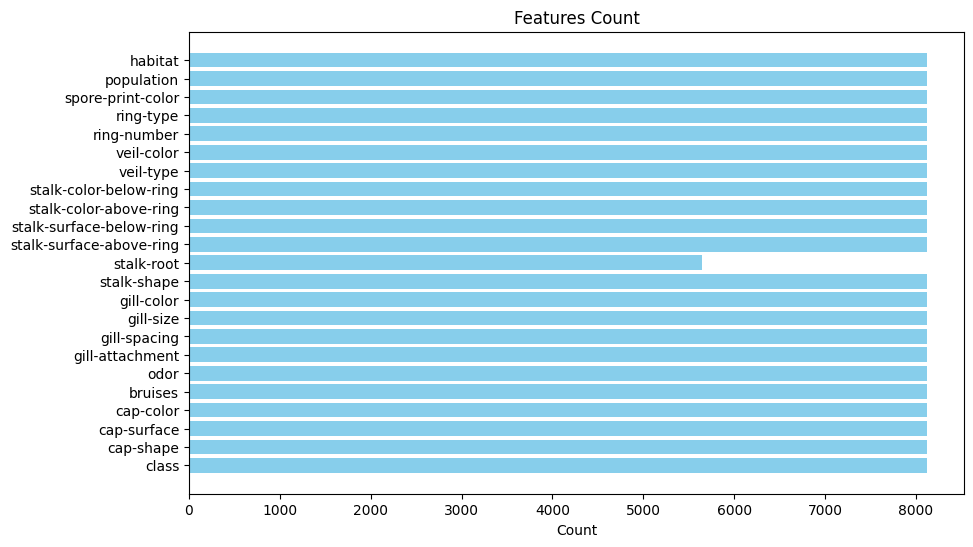

In [3]:
#@hidden_cell

# Calculate count for each column
columns_count = df.apply(lambda col: col.value_counts().sum())

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the horizontal bar chart
bars1 = ax1.barh(columns_count.index, columns_count.values, color='skyblue')

# Add labels and title to the axis
ax1.set_xlabel('Count')
ax1.set_title('Features Count')

# Show the plot
plt.show()


# <center><div style="font-family: 'Roboto', sans-serif;"> 🧮 Data Wrangling🧼  </div></center>

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'>Missing values :</span></h4></b>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li>As per above information, it is evident that there is <span style = 'color:#F05B02'><b> missing data in stalk-root </b></span> column</li>
    <li>Datatype of all features indicates that there is <span style = 'color:#F05B02'><b>only categorical data in all features,</b></span> not any int, float or datatypes.</li>

In [5]:
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span>checking duplicates</h4></b>

In [6]:
df.duplicated().sum()

0

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li><span style = 'color:#F05B02'><b>No duplicate rows to drop,</b></span> it means all rows are important.</li>
    </div>

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'>Anomalies detection :</span></h4></b>
</div>

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li>As it is completely a categorical data, there are <span style = 'color:#F05B02'><b>no outliers</b></span> in the data.</li>
    </div>

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'>Checking unique values :</span></h4></b>
</div>

<Axes: xlabel='unique', ylabel='index'>

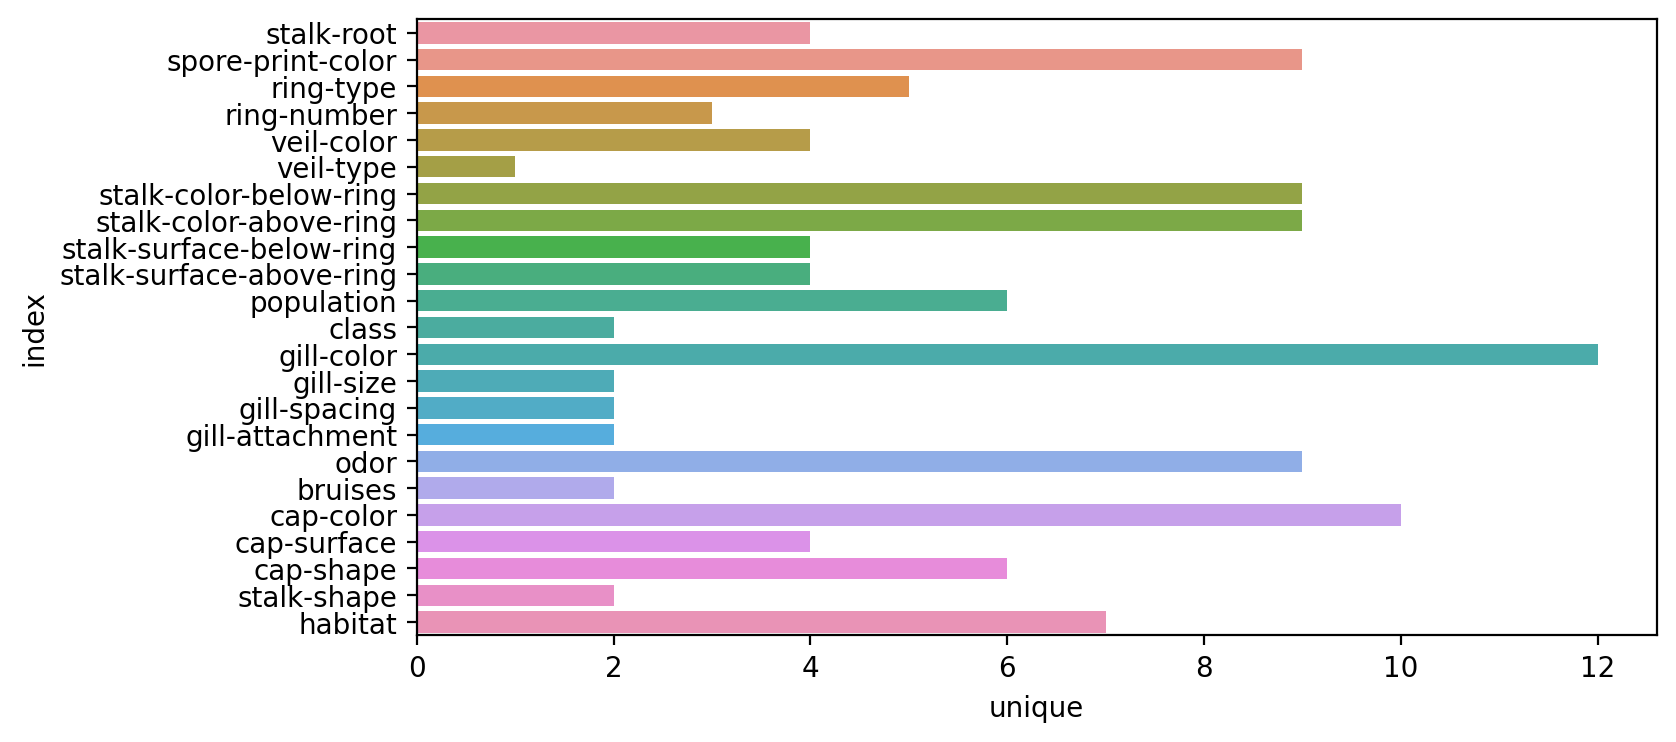

In [7]:
data = df.describe(include='all').T.reset_index().sort_values('count')

# Visualizizng count of categories in every feature:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(data,x='unique',y='index')

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li><span style = 'color:#F05B02'><b>Visual representation of features:</b></span></li>
    <ul>
        <li>It indicates that there <span style = 'color:#F05B02'><b>12 subcategories(more) in gill-color attribute.</b></span></li>
        <li><span style = 'color:#F05B02'><b>Veil-type</b></span> is having <span style = 'color:#F05B02'><b>100% data with only one value.</b></span></li>
    </ul>
 </div>

In [8]:
# Dropping useless column
df = df.drop('veil-type', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# <center><div style="font-family: 'Roboto', sans-serif;"> 📄 Feature Engineering 🕵️‍ </div></center>

In [9]:
#@hidden_cell

# To get the default color cycle from Matplotlib:
default_color_cycle = mpl.rcParams['axes.prop_cycle'].by_key()['color']

def Feature_study(data, column, custom_labels=None):

    value_counts = data[column].value_counts()
    labels = value_counts.index.astype(str)
    counts = value_counts.values.tolist()

    # Use custom labels if provided, otherwise use the default labels
    if custom_labels is not None:
        labels = custom_labels

    # Use the first 25 default Matplotlib colors
    colors = default_color_cycle[:len(labels)]

    fig = go.Figure(data=[go.Bar(x=labels, y=counts, marker=dict(color=colors))])

    fig.update_layout(
        title=f'Counts of {column} Feature',
        xaxis_title=column,
        yaxis_title='Counts',
        width=800,
        height=600,
        showlegend=False  # No legend for a bar chart
    )

    fig.show()

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1> Class:</h1>
    <li><b style = 'background-color:#fff44f'>Edible mushrooms(e)</b> are fungi that can be <b style = 'background-color:#fff44f'>serves to protect gills</b> safely consumed as food by humans.</li>
   <li><b style = 'background-color:#fff44f'>Poisonous mushrooms(p)</b> are fungi that can be <b style = 'background-color:#fff44f'>toxic and harmful if ingested,</b> potentially causing illness or even death.</li>
   
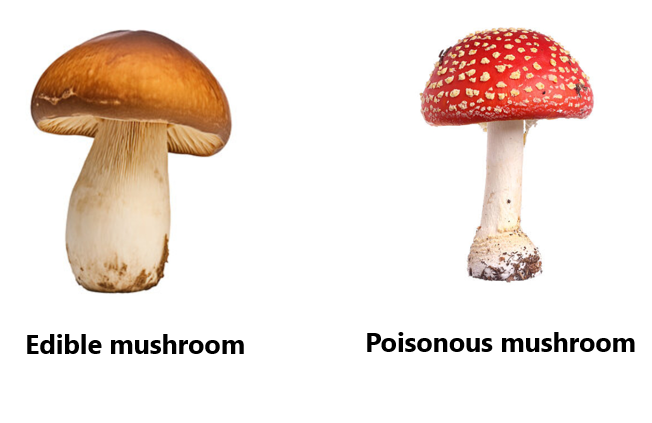


In [10]:
custom_labels = ['Edible Mushrooms','Poisonous Mushrooms']
Feature_study(df, 'class', custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> There are <span style = 'background-color:#fff44f'><b>more edible mushrooms than poisonous mushrooms.</b></span></li>
   <li> The percentage of edible mushrooms is <span style = 'background-color:#fff44f'><b> 51.8%.</b></span></li>
   <li> The percentage of poisonous mushrooms is <span style = 'background-color:#fff44f'><b> 48.2%.</b></span></li>
</div>

<div style='border: 3px solid green; background-color: lightgreen; padding: 10px;'>
    <li> Plot indicates that the class is <span style='color: darkgreen;'><b>BALANCED</b></span></li>
</div>


<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b>Cap :</b></h1>
    <li>It is the <b style = 'background-color:#fff44f'>uppermost part</b> of Mushroom, it <b style = 'background-color:#fff44f'>serves to protect gills</b> and other reproductive structures underneath.</li>
    <li><b style = 'background-color:#fff44f'>Cap shape</b> may be <b style = 'background-color:#fff44f'>bell(b), conical(c), convex(x), flat(f), knobbed(k) or sunken(s).</b></li></br>

    
    
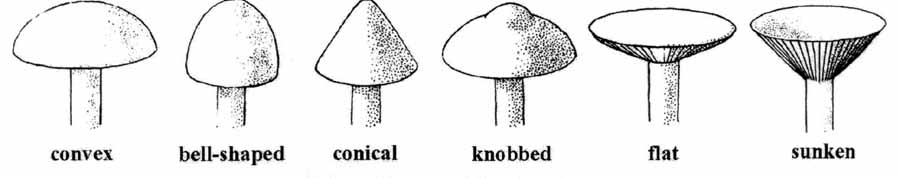

In [11]:
custom_labels = ['convex(x)','flat(f)','knobbed(k)','bell(b)','sunken(s)','conical(c)']
Feature_study(df, 'cap-shape',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>   
   <li> Sequence of presence of mushrooms as per cap shape are <span style = 'background-color:#fff44f'><b>convex, flat, knobbed, bell, sunken, conical.</b></span></li>
   <li> As per capshape, there are more <span style = 'background-color:#fff44f'><b>convex shaped caps about 45%,</b></span> than all other cap - surfaces</li>  
</div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1> Cap surfaces: </h1></br>
    

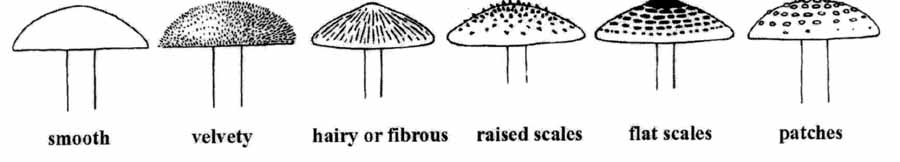

In [12]:
custom_labels = ['scaly(y)','smooth(s)','fibrous(f)','grooves(g)'] 
Feature_study(df,'cap-surface',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> As per data distribution, there are <span style = 'background-color:#fff44f'><b>more scaly mushrooms</b></span>than other mushrooms like smooth, fibrous and grooves.</li>
   <li> Cap surface with <span style = 'background-color:#fff44f'><b>grooves are less in number.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Cap color: </b></h1>
    <li><b style = 'background-color:#fff44f'>Cap-color</b> may be <b style = 'background-color:#fff44f'>brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y).</b></li></br>
    </div>

In [13]:
custom_labels = ['brown(n)','gray(g)','red(e)','yellow(y)','white(w)','buff(b)','pink(p)','cinnoman(c)','purple(u)','green(r)']
Feature_study(df,'cap-color',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> As there are more mushroom types, we have n number of colors of mushrooms.</li>
   <li> But, as per data, <span style = 'background-color:#fff44f'><b>there are more brown colored mushrooms,</b></span> least are green colored mushrooms.</li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Bruises: </b></h1>
    <li>Bruises is a specific visual and often <b style = 'background-color:#fff44f'>color-changing reaction</b> that occurs <b style = 'background-color:#fff44f'>when pressure or physical damage is applied</b> to mushrooms. This reaction is particularly common in certain types of mushrooms. When you handle or touch these mushrooms and they sustain damage, they may exhibit a <b style = 'background-color:#fff44f'>color change or discoloration</b> at the affected area. This color change is commonly referred to as <b style = 'background-color:#fff44f'>"Bruising."</b>. It is <b style = 'background-color:#fff44f'>an important identification characterstic</b> that helps to <b style = 'background-color:#fff44f'>differentiate</b> between different mushroom species whether they are <b style = 'background-color:#fff44f'>toxic or edible</b>. so, if mushrooms exhibit bruising mechanism,considered as <b style = 'background-color:#fff44f'>True(t)</b>,if mushroom won't exhibit this mechanism, it is <b style = 'background-color:#fff44f'>False(f)</b>.</li></br>
    </div>

In [14]:
custom_labels = ['False(f)','True(t)']
Feature_study(df,'bruises',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li><span style = 'background-color:#fff44f'><b>58.4% mushrooms doesn't show any type of discoloration</b></span> mechanism when they are physically damaged.</li>
   <li> <span style = 'background-color:#fff44f'><b>41.6% mushrooms show Bruises mechanism.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Odor: </b></h1>
    <li>Odor means <b style = 'background-color:#fff44f'>smell or scent</b> emitted by Mushrooms.Smell of mushrooms can vary widely depending on the species. Mushroom odors can range from pleasant and earthy to foul or pungent.</li>
    <li> Odor of a mushroom is often an important diagnostic characteristic for identifying different species.</li>
    <li> Odor may be  <b style = 'background-color:#fff44f'>almond(a),anise(l), creosote(c), fishy(y), foul(f), musty(m), pungent(p), spicy(s), none(n).</b></li></br>
    </div>

In [15]:
custom_labels = ['free(f)','attached(a)','descending(d)','notched(n)']
Feature_study(df,'gill-attachment',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li><span style = 'background-color:#fff44f'><b>Almost(43.4%) half </b></span>of the mushrooms doesn't release anytype of odor.</li>
   <li>All other mushrooms release smell.</li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Gill attachment: </b></h1>
    <li><b style = 'background-color:#fff44f'>Gill - attachment</b> to the stem is an essential characterstic for identifying and classifying different species. Attachment type can vary significantly like <b style = 'background-color:#fff44f'>if attached(a)</b> or <b style = 'background-color:#fff44f'>descended(d)</b> or <b style = 'background-color:#fff44f'>notched(n)</b> and <b style = 'background-color:#fff44f'>no attachement means free(f),</b> which  is a crucial feature for differentiating mushroom species.</li></br>

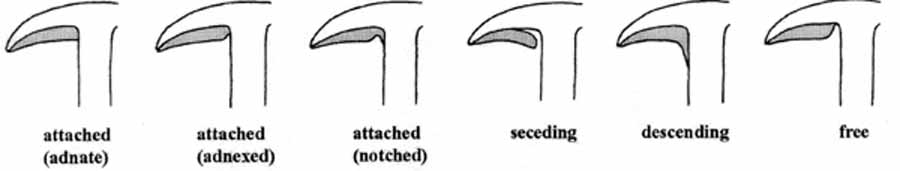

In [16]:
custom_labels = ['none(n)','foul(f)','fishy(y)','spicy(s)','almond(a)','anise(l)','pungent(p)','creosote(c)','musty(m)']
Feature_study(df,'odor',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>As mentioned in data description,<span style = 'background-color:#fff44f'><b>gill attachement is of 4 types.</b></span></li>
   <li>But, data contains <span style = 'background-color:#fff44f'><b>97.4% of mushrooms have no attachement to gills.</b></span></li>
   <li><span style = 'background-color:#fff44f'><b>Almost(43.4%) half </b></span>Only 2.58% of mushrooms have gills attached in between themselves. </li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Gill spacing: </b></h1>
    <li><b style = 'background-color:#fff44f'>Gill spacing</b> in mushrooms refers to the <b style = 'background-color:#fff44f'>arrangement and distribution of the gills</b> on the underside of the mushroom's cap.Spacing between gills may be <b style = 'background-color:#fff44f'>close(c), crowded(w),distant(d)</b>, is an important characteristic used in mushroom identification and classification.</li></br>
    
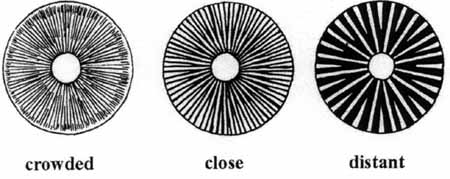

In [17]:
custom_labels = [ 'close(c)','crowded(w)','distant(d)']
Feature_study(df,'gill-spacing',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>As per data description, there are <span style = 'background-color:#fff44f'><b>3 types of gill spacing,</b></span></li>
   <li> <span style = 'background-color:#fff44f'><b>Almost 84% of mushrooms</b></span> have no spacing between gills, means their gills are very close to each other.</li>
   <li><span style = 'background-color:#fff44f'><b>16% of mushrooms have crowded gills.</b></span></li>
   <li> But, close and crowded gills are same.</li> 
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Gill size: </b></h1>
    <li> Gill-size refers to <b style = 'background-color:#fff44f'>dimensions or size of gills</b> which may vary like <b style = 'background-color:#fff44f'>broad gills(b) means thick</b> or <b style = 'background-color:#fff44f'>narrow gills(n)means thin</b>.</li>
    </div>

In [18]:
custom_labels = ['broad(b)','narrow(n)']
Feature_study(df,'gill-size',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
  <li> <span style = 'color:#F05B02'><b>69%</b></span> of mushrooms have narrow gills.</li>
  <li> <span style = 'color:#F05B02'><b>31%</b></span> of mushrooms have broad gills.</li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Gill color: </b></h1>
    <li> Gill-color on underside of Mushroom's cap is an important characterstic for identifying and classifying different mushroom species. Gill-color may be <b style = 'background-color:#fff44f'>black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y).</b></li></br>
    </div>

In [19]:
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
custom_labels = ['buff(b)','pink(p)','white(w)','brown(n)','gray(g)','chocolate(h)','purple(u)','black(k)','red(e)','yellow(y)','orange(o)','green(r)']
Feature_study(df,'gill-color',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> Most of mushrooms have <span style = 'background-color:#fff44f'><b>buff colored gills </b></span>and very least are green colored gills.</li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk shape: </b></h1>
    <li> stalk shape refers to <b style = 'background-color:#fff44f'>shape of stem</b> in mushrooms. It is one of the key characterstics used for identification and classification.Some mushrooms have stems that are thicker at the base, creating a bulbous or swollen appearance.hese stems are called <b style = 'background-color:#fff44f'>Enlarged stems(e)</b>, where as some stems become progrssively thinner as they descend from the cap to the base.These stems are called as <b style = 'background-color:#fff44f'>Tapering stems(t)</b></li></br>
    </div>

In [20]:
# stalk-shape: enlarging=e,tapering=t
custom_labels = ['tapering(t)','enlarging(e)']
Feature_study(df,'stalk-shape',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> There are more <span style = 'background-color:#fff44f'><b>tapered stalks </b></span>than enlarged stalks.</li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk root types: </b></h1>
    <li> Stalk-root refers to <b style = 'background-color:#fff44f'>basal or lower portion of stem that is in contact with or attached to substrate.</b> The nature and type of the stalk root can vary among different mushroom species and can be an important identification feature. stalk root may be <b style = 'background-color:#fff44f'>lbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?).</b></li></br>
    
    
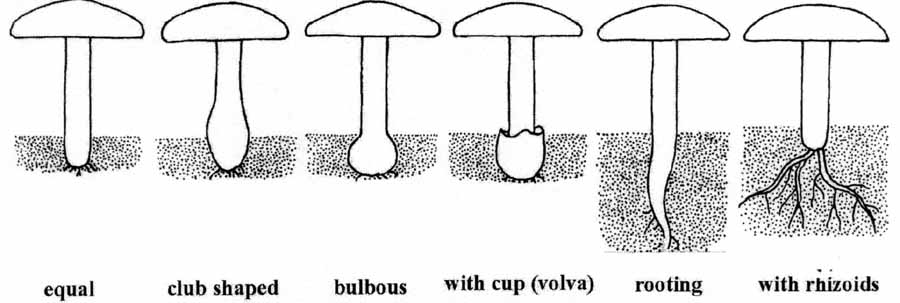

In [21]:
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
custom_labels=['bulbous(b)','missing(?)','equal(e)','cup(c)','rooted(r)']
Feature_study(df,'stalk-root',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li> Most of the stalk roots are <span style = 'background-color:#fff44f'><b>bulbous. </b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk surface above ring: </b></h1>
    <li> The stem surface above ring in mushrooms can exhibit various features, textures, and colors, and these characteristics are essential for identifying different mushroom species.</li>
    <li> Area above the ring is often referred to as the <b style = 'background-color:#fff44f'>"upper stipe"</b></li>
    <li> stalk surface above ring may be <b style = 'background-color:#fff44f'>smooth(s), silky(k), fibrous(f), scaly(s).</b></li>
    </div>

In [22]:
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
custom_labels=['smooth(s)','silky(k)','fibrous(f)','scaly(y)']
Feature_study(df,'stalk-surface-above-ring',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>Most of the mushrooms have <span style = 'background-color:#fff44f'><b>smooth stalk surface above the ring.</b></span></li>
   <li> scaly stalk surface above the ring are <span style = 'background-color:#fff44f'><b>very less(about 0.29%). </b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk surface below ring: </b></h1>
    <li> Area below the ring is often referred to as the <b style = 'background-color:#fff44f'>"lower stipe"</b></li>
    <li> Lower stipe may be <b style = 'background-color:#fff44f'>smooth(s), silky(k), fibrous(f), scaly(s).</b></li></br>
    </div>

In [23]:
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
custom_labels=['smooth(s)','silky(k)','fibrous(f)','scaly(y)']
Feature_study(df,'stalk-surface-below-ring',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>Most of the stalk surface below the ring are <span style = 'background-color:#fff44f'><b>smooth textured.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk color above ring: </b></h1>
    <li> It may be <b style = 'background-color:#fff44f'>white(w), pink(p), gray(g), brown(n), buff(b), orange(o), red(e), cinnamon(c), yellow(y)</b></li></br>
    </div>

In [24]:

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
custom_labels=['white(w)','pink(p)','gray(g)','brown(n)','buff(b)','orange(o)','red(e)','cinnamon(c)','yellow(y)']
Feature_study(df,'stalk-color-above-ring',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
  <li>Most of the mushrooms are<span style = 'background-color:#fff44f'><b>white colored above ring </b></span>of the stalk surface.</li>
  <li>About <span style = 'background-color:#fff44f'><b> 0.44% of mushrooms have yellow color above the ring </b></span>of stalk surface.</li>
  </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1><b> Stalk color below ring: </b></h1>
    <li> It may be <b style = 'background-color:#fff44f'>white(w), pink(p), gray(g), brown(n), buff(b), orange(o), red(e), cinnamon(c), yellow(y)</b></li></br>
    </div>

In [25]:
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
custom_labels=['white(w)','pink(p)','gray(g)','brown(n)','buff(b)','orange(o)','red(e)','cinnamon(c)','yellow(y)']
Feature_study(df,'stalk-color-below-ring',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>It is same as like above feature.</li>
   <li>But, below ring of stalk, there are <span style = 'background-color:#fff44f'><b>mostly white colored (54%).</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1> Veil color: </h1>
    <li>veil color may be <b style = 'background-color:#fff44f'>white(w), brown(n), orange(o), yellow(y).</b></li></br>
    </div>

In [26]:
# veil-color: brown=n,orange=o,white=w,yellow=y
custom_labels=['white(w)','brown(n)','orange(o)','yellow(y)']
Feature_study(df,'veil-color',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
 <li>As veil type is same for all mushrooms(partial). But, they are <span style = 'background-color:#fff44f'><b>with different colors.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
    <h1> Ring number: </h1>
    <li>Rings are <b style = 'background-color:#fff44f'>membranous or tissue-like structures that encircle the stem</b> of certain mushrooms.</li>
    <li>Ring number refers to <b style = 'background-color:#fff44f'>no. of rings found on a stem</b> of a mushroom.</li>
    <li>No.of rings may be <b style = 'background-color:#fff44f'>one, two or none.</b></li></br>
    </div>

In [27]:
# ring-number: none=n,one=o,two=t
custom_labels=['one(o)','two(t)','none(n)']
Feature_study(df,'ring-number',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
   <li>There are <span style = 'background-color:#fff44f'><b>mostly one ringed </b></span>followed by two ringed.</li>
   </div>

<div style = 'border:3px solid yellow;padding:10px'>
    <h1>ring type:</h1></br>


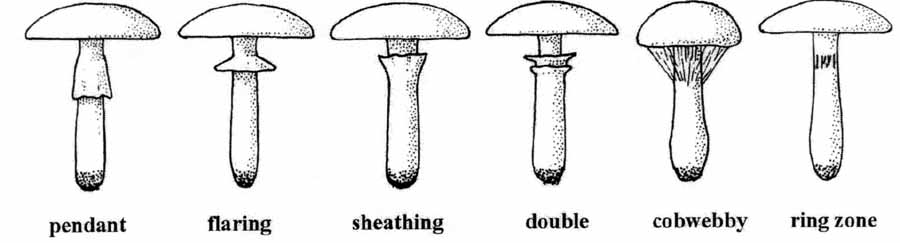

In [28]:
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
custom_labels=['pendent(p)','evanescent(e)','large(l)','flaring(f)','none(n)']
Feature_study(df,'ring-type',custom_labels)

<div style = 'border:3px solid yellow;padding:10px'>
<li>There are 4 types of rings mentioned in data and some mushrooms had <span style = 'background-color:#fff44f'><b>no rings. </b></span></li>
</div>

<div style = 'border:3px solid yellow;;padding:10px'>
<h1> Spore print color: </h1>
    <li>It refers to <b style = 'background-color:#fff44f'>color of the spore deposit left behind by a mushroom</b> when its mature spores are released.</li>
    <li>It is a key characteristic used in the identification and classification of mushrooms.</li></br>
    </div>

In [29]:
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
custom_labels=['white(w)','brown(n)','black(k)','chocolate(h)','green(r)','purple(u)','orange(o)','yellow(y)','buff(b)']
Feature_study(df,'spore-print-color',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
    <li>Spore print color is <span style = 'background-color:#fff44f'><b>mostly white.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
<h1> Population: </h1>
    <li>Population refers to no. of species distributed in a particular area.</li>
    <li> <b style = 'background-color:#fff44f'>Several :</b> Multiple or several individual mushroom species distributed in a specific geographical area.</li>
    <li> <b style = 'background-color:#fff44f'>Solitary :</b> Single individual species distributed in an area.</li>
    <li> <b style = 'background-color:#fff44f'>Scattered :</b> Mushrooms distribution is scattered in an area without clusters.</li>
    <li> <b style = 'background-color:#fff44f'>Clustered :</b> Mushrooms growing in groups or simply colonies.</li></br>
    </div>

In [30]:
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
custom_labels=['several(v)','solitary(y)','scattered(s)','numerous(n)','abundant(a)','clustered(c)']
Feature_study(df,'population',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
<li>As per population, multiple individual species growing in a specific area are more. mostly white.</li>
   <li> Solitary means single growing mushrooms are more after <span style = 'background-color:#fff44f'><b>several mushrooms.</b></span></li>
   </div>

<div style = 'border:3px solid yellow;;padding:10px'>
<h1> Habitat: </h1>
    <li><b style = 'background-color:#fff44f'>Place where mushrooms grow</b> is called Habitat.</li>
    <li>Mushrooms can grow on <b style = 'background-color:#fff44f'>woods, grasses, paths, leaves, urban environments, meadows, waste.</b></li></br>
    </div>


In [31]:
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
custom_labels=['woods(d)','grasses(g)','paths(p)','leaves(l)','urban(u)','meadows(m)','waste(w)']
Feature_study(df,'habitat',custom_labels)

<div style = 'border:3px solid yellow;;padding:10px'>
<li> As per habitat, most of mushrooms in given data are grown on <span style = 'background-color:#fff44f'><b>woods, grasses, paths,leaves, urban environments, meadows followed by waste.</b></span></li>
    </div>

In [32]:
# function to create stacked countplots to gain insights:
def stacked_countplots_with_target(dataframe, target_column):
    num_columns = len(dataframe.columns) - 1
    num_plots_per_row = 4
    num_rows = (num_columns - 1) // num_plots_per_row + 1

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
    
    # giving custom colors for edible (e) and poisonous (p) mushrooms:
    custom_colors = {'e': 'green', 'p': 'red'}
    
    for index, column in enumerate(dataframe.columns[1:]):  # Exclude the target column
        row = index // num_plots_per_row
        col = index % num_plots_per_row
        ax = axes[row, col]
        
        cross_tab = pd.crosstab(dataframe[column], dataframe[target_column])
        stacked_bar = cross_tab.plot(kind='bar', stacked=True, ax=ax, color=[custom_colors.get(x, 'gray') for x in cross_tab.columns])
        ax.set_title(f'{column} with respect to {target_column}')
        
        # Adding legend with custom labels for edible and poisonous:
        edible_patch = plt.Rectangle((0,0), 1, 1, fc='green')
        poisonous_patch = plt.Rectangle((0,0), 1, 1, fc='red')
        ax.legend([edible_patch, poisonous_patch], ['Edible', 'Poisonous'])
    
    # Removing any empty subplots if the number of columns is not a multiple of 4:
    if num_columns % num_plots_per_row != 0:
        for i in range(num_columns % num_plots_per_row, num_plots_per_row):
            fig.delaxes(axes[-1, i])
    
    plt.tight_layout()
    plt.show()

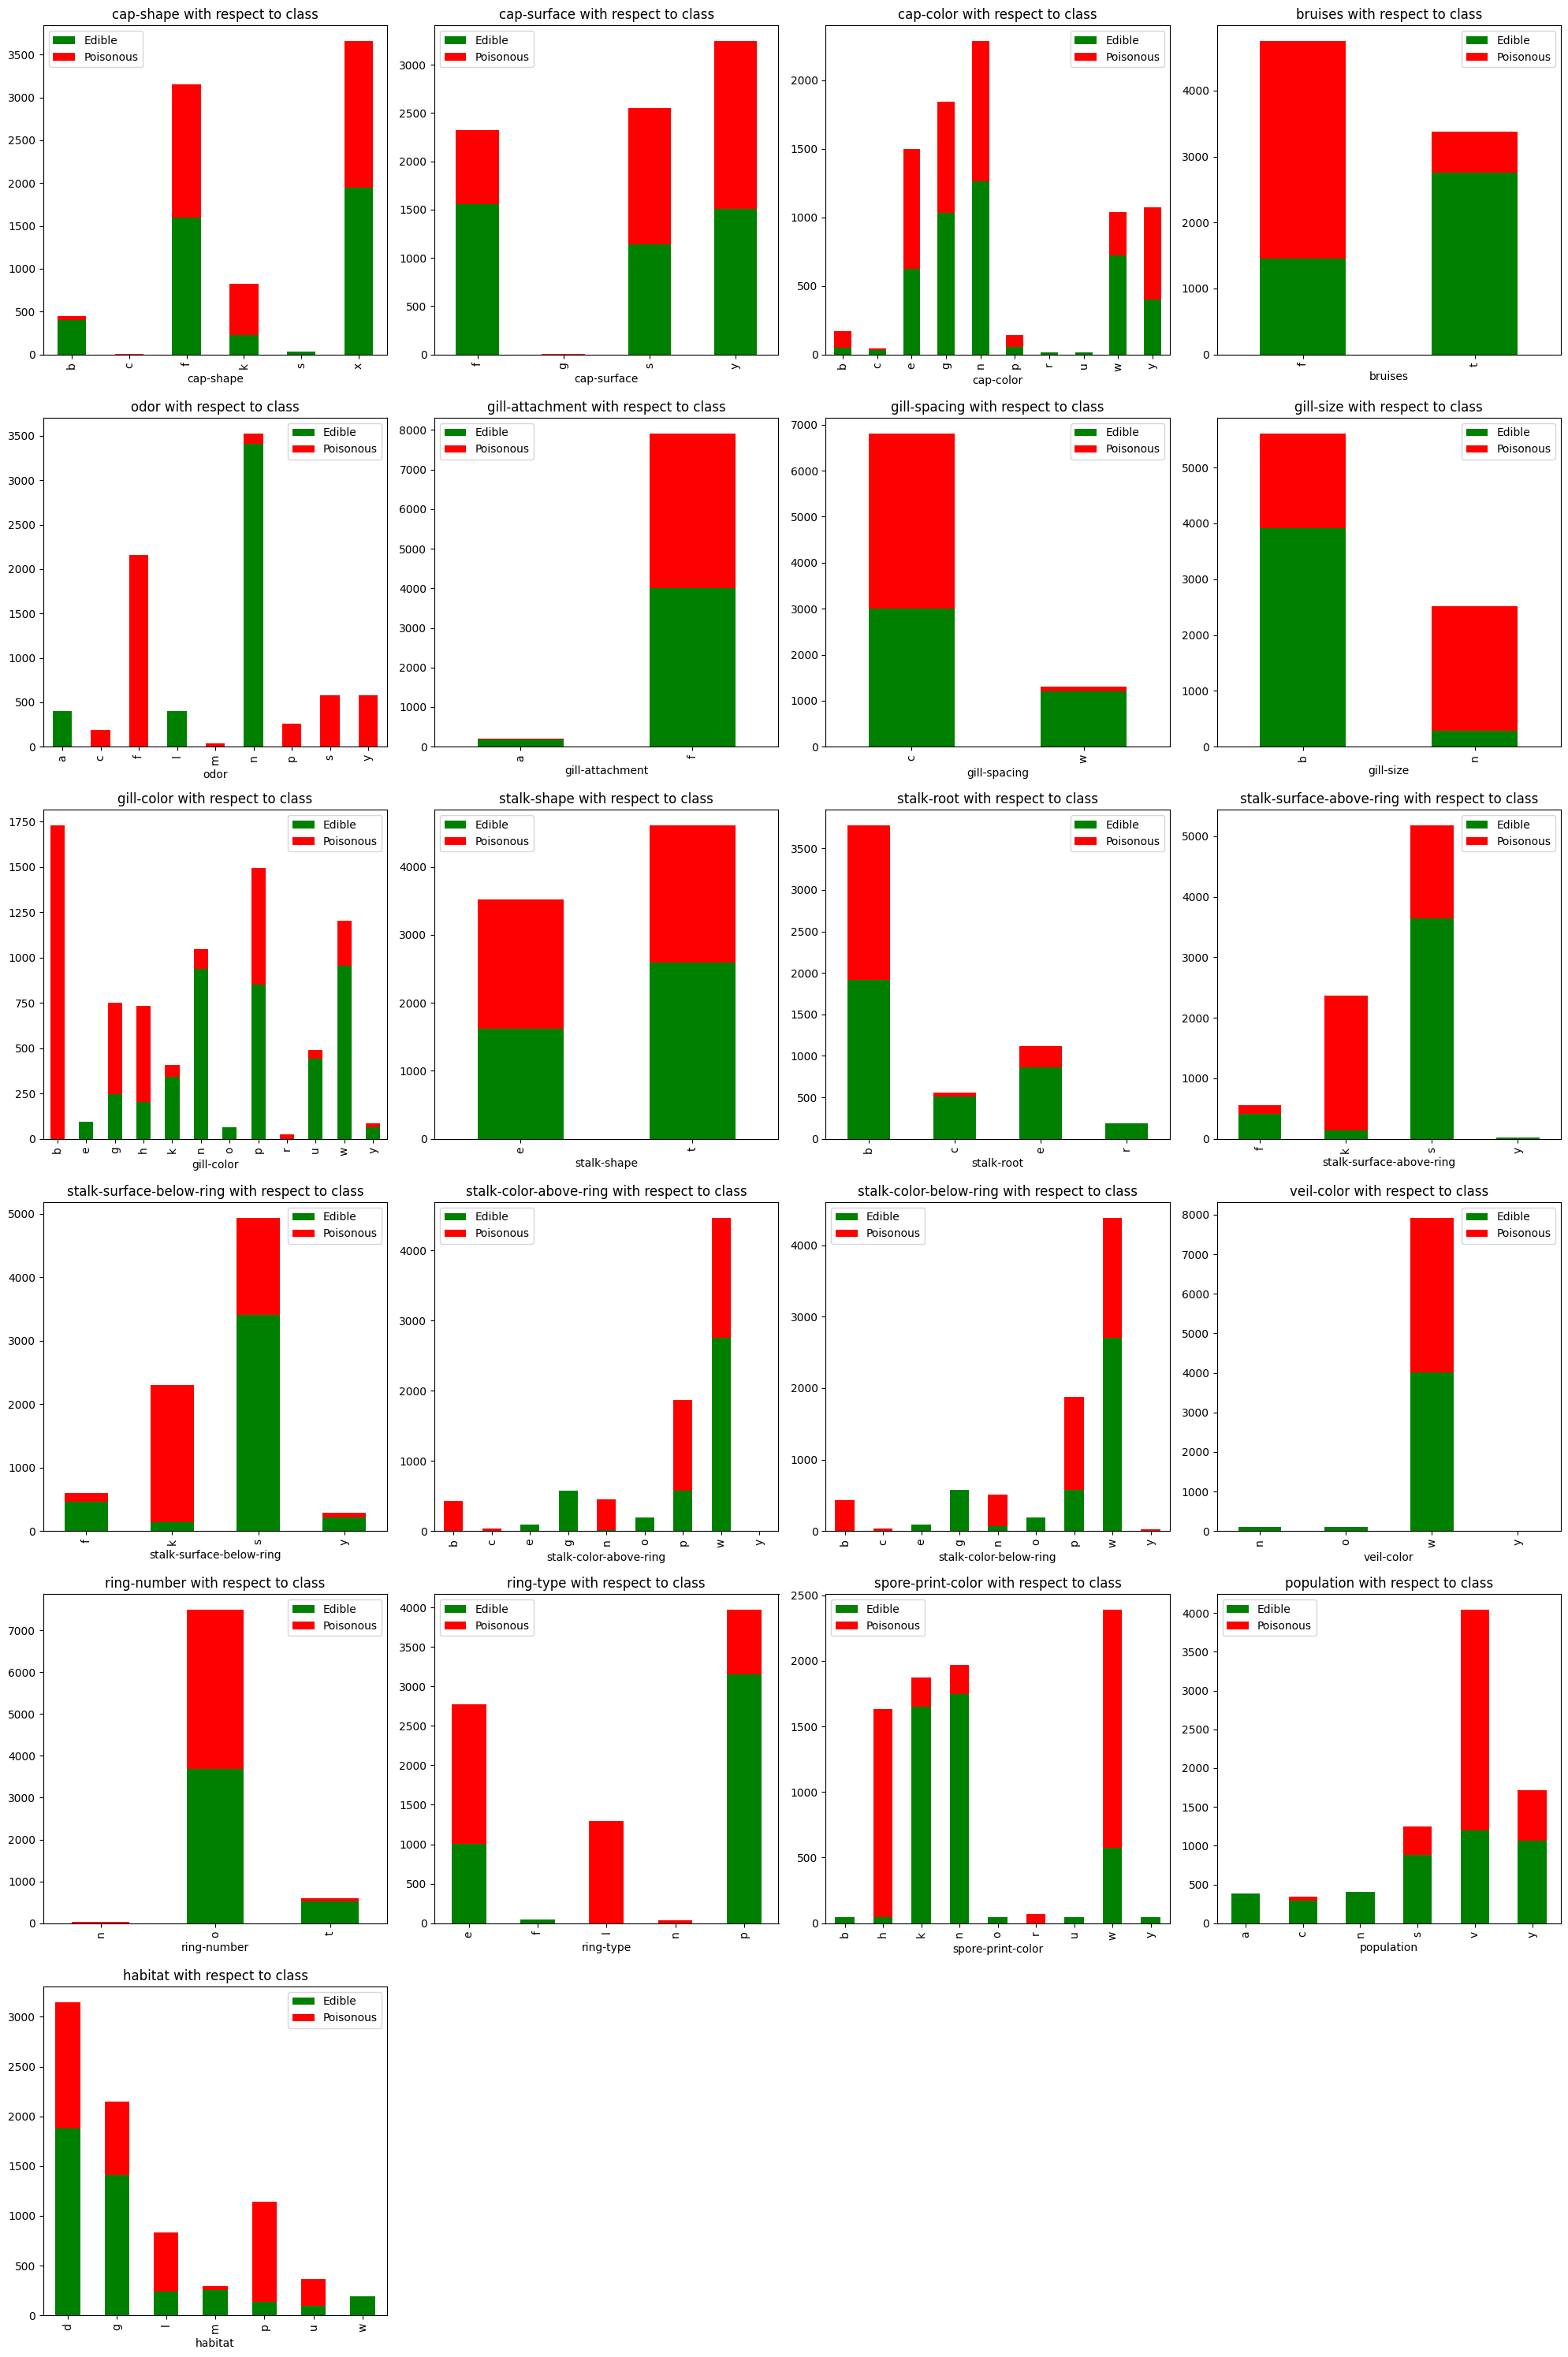

In [33]:
stacked_countplots_with_target(df, 'class')

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <h2> Data Intrepretation </h2>
    <b> cap-shape:</b><br>
    <li> All sunken(s) mushrooms are edible mushrooms & all conical(c) mushrooms are poisonous mushrooms.</li>
    <b> cap-surface:</b><br>
    <li> All grooved(g) mushrooms are poisonous mushrooms.</li>
    <b> cap-color:</b><br>
    <li> Mushrooms with green(r) and purple(u) cap are all edible mushrooms.</li>
    <b> bruises:</b><br>
    <li> Mushroom showing bruises mechanism are consumed more compared unbruised mushrooms.</li>
    <b> odor:</b><br>
    <li> odor indicates whether mushrooms are edible or poisonous.</li>
    <li> odorless mushrooms are consumed more.</li>
    <li> All anise(l) & almond(a) odored mushrooms are edible mushrooms.</li>
    <li> All creosote(c),foul(f),musty(m),pungent(p),spicy(s),fishy(y) are poisonous mushrooms</li>
    <b> gill-color:</b><br>
    <li> Mushrooms with buff(b) and green(r) colored gills are all poisonous mushrooms.</li>
    <li> Mushrooms with red(e) and orange(o) colored gills are all edible mushrooms.</li>
    <b> stalk-roots:</b><br>
    <li> All Rooted(r) stalk root mushrooms are edible mushrooms.<li>
    <b> stalk_color_above_ring & stalk_color_below_ring:</b><br>
    <li> All red(r), gray(g) & orange(o) colored mushrooms are edible mushrooms.</li>
    <li> All buff(b) & cinnomon(c) colored mushrooms are poisonous mushrooms.</li>
    <li> stalk_color_below_ring also contains yellow color are also poisonous mushrooms.</li>
    <b> veil-color:</b><br>
    <li> veil-type with brown(n) & orange(o) colors are all edible mushrooms.</li>
    <li> veil-type with yellow(y) color are all poisonous mushrooms.</li>
    <b> ring-number:</b><br>
    <li> Mushroom without any rings(none(n)) are all poisonous mushrooms.</li>
    <b> ring-type:</b><br>
    <li> Mushrooms containing flare(f) type rings are all edible mushrooms.</li>
    <li> Mushrooms either containing large(l) type rings or not containing any rings(none(n)) are poisonous mushrooms.</li>
    <b> spore print color:</b><br>
    <li> only edible mushrooms have black(k), orange(o), purple(u) or yellow(y) spore print color.</li>
    <li> only poisonous mushrooms have green(r) spore print color.</li>
    <b> population:</b><br>
    <li> only edible mushrooms have abundant(a) or numerous(n) population.</li>
    <b> habitat:</b><br>
    <li> Mushroom growing in waste(w) type habitat are all edible mushrooms</li>
    </div>

In [34]:
# looking data:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,None,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,None,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,None,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,None,s,k,w,w,w,o,e,w,v,l


<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Imputing values :</span></h4></b>
</div>

In [35]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# "stalk-root" is my target column

# Exclude rows with 'nan' in 'stalk-root' column
df_no_nan = df.dropna(subset=['stalk-root'])

# Prepare the features and target
X = df_no_nan.drop("stalk-root", axis=1)
y = df_no_nan["stalk-root"]

# Identify categorical features
cat_features = X.select_dtypes(include=['object']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

# Train the model on the training data
model.fit(X_train, y_train, cat_features.tolist())

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: ", accuracy)

# Print out the predictions
print("Predictions: ", y_pred)

# Identify the indices where values are NaN
nan_indexes = df[df['stalk-root'].isnull()].index

# Prepare the features for prediction by excluding the target column
X_pred = df.drop("stalk-root", axis=1)

# Use the trained model to predict the missing values
preds_nan = model.predict(X_pred.iloc[nan_indexes])

# Replace NaN values with predicted values in the DataFrame
df.loc[nan_indexes, 'stalk-root'] = preds_nan.flatten()

0:	learn: 0.5322082	total: 69.4ms	remaining: 624ms
1:	learn: 0.3978932	total: 82.3ms	remaining: 329ms
2:	learn: 0.1517054	total: 95.2ms	remaining: 222ms
3:	learn: 0.4424038	total: 105ms	remaining: 158ms
4:	learn: 0.8935955	total: 116ms	remaining: 116ms
5:	learn: 0.4873204	total: 126ms	remaining: 84.2ms
6:	learn: 0.3408531	total: 136ms	remaining: 58.4ms
7:	learn: 0.1835903	total: 146ms	remaining: 36.6ms
8:	learn: 0.1761962	total: 157ms	remaining: 17.4ms
9:	learn: 0.1739913	total: 167ms	remaining: 0us
Model Accuracy:  0.9973427812223207
Predictions:  [['e']
 ['b']
 ['b']
 ...
 ['c']
 ['b']
 ['b']]


In [36]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,b,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,c,s,k,w,w,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,o,c,l


<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h3><span style='color:#85BB65'>|</span> Label encoding </h3></b>

In [37]:
# label encoding of all columns:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [38]:
# Categories in each feature x
column_list = df.columns.values.tolist()

for column_name in column_list:
    print(f'\033[1m{column_name}\033[0m')
    print(copy[column_name].unique())
    print(list(map(str,df[column_name].unique())))
    print('\n')

class
['p' 'e']
['1', '0']


cap-shape
['x' 'b' 's' 'f' 'k' 'c']
['5', '0', '4', '2', '3', '1']


cap-surface
['s' 'y' 'f' 'g']
['2', '3', '0', '1']


cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['4', '9', '8', '3', '2', '5', '0', '7', '1', '6']


bruises
['t' 'f']
['1', '0']


odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['6', '0', '3', '5', '2', '1', '8', '7', '4']


gill-attachment
['f' 'a']
['1', '0']


gill-spacing
['c' 'w']
['0', '1']


gill-size
['n' 'b']
['1', '0']


gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['4', '5', '2', '7', '10', '3', '9', '1', '0', '8', '11', '6']


stalk-shape
['e' 't']
['0', '1']


stalk-root
['e' 'c' 'b' 'r' '?']
['2', '1', '0', '3']


stalk-surface-above-ring
['s' 'f' 'k' 'y']
['2', '0', '1', '3']


stalk-surface-below-ring
['s' 'f' 'y' 'k']
['2', '0', '3', '1']


stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['7', '3', '6', '4', '0', '2', '5', '1', '8']


stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 

In [39]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,1,2,1,7,7,2,1,0,7,4,2


<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li> <span style = 'color:#F05B02'><b>Label encoding of categorical columns</b></span></li>
</div>

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h3><span style='color:#85BB65'>|</span>Correlation matrix</h3></b>

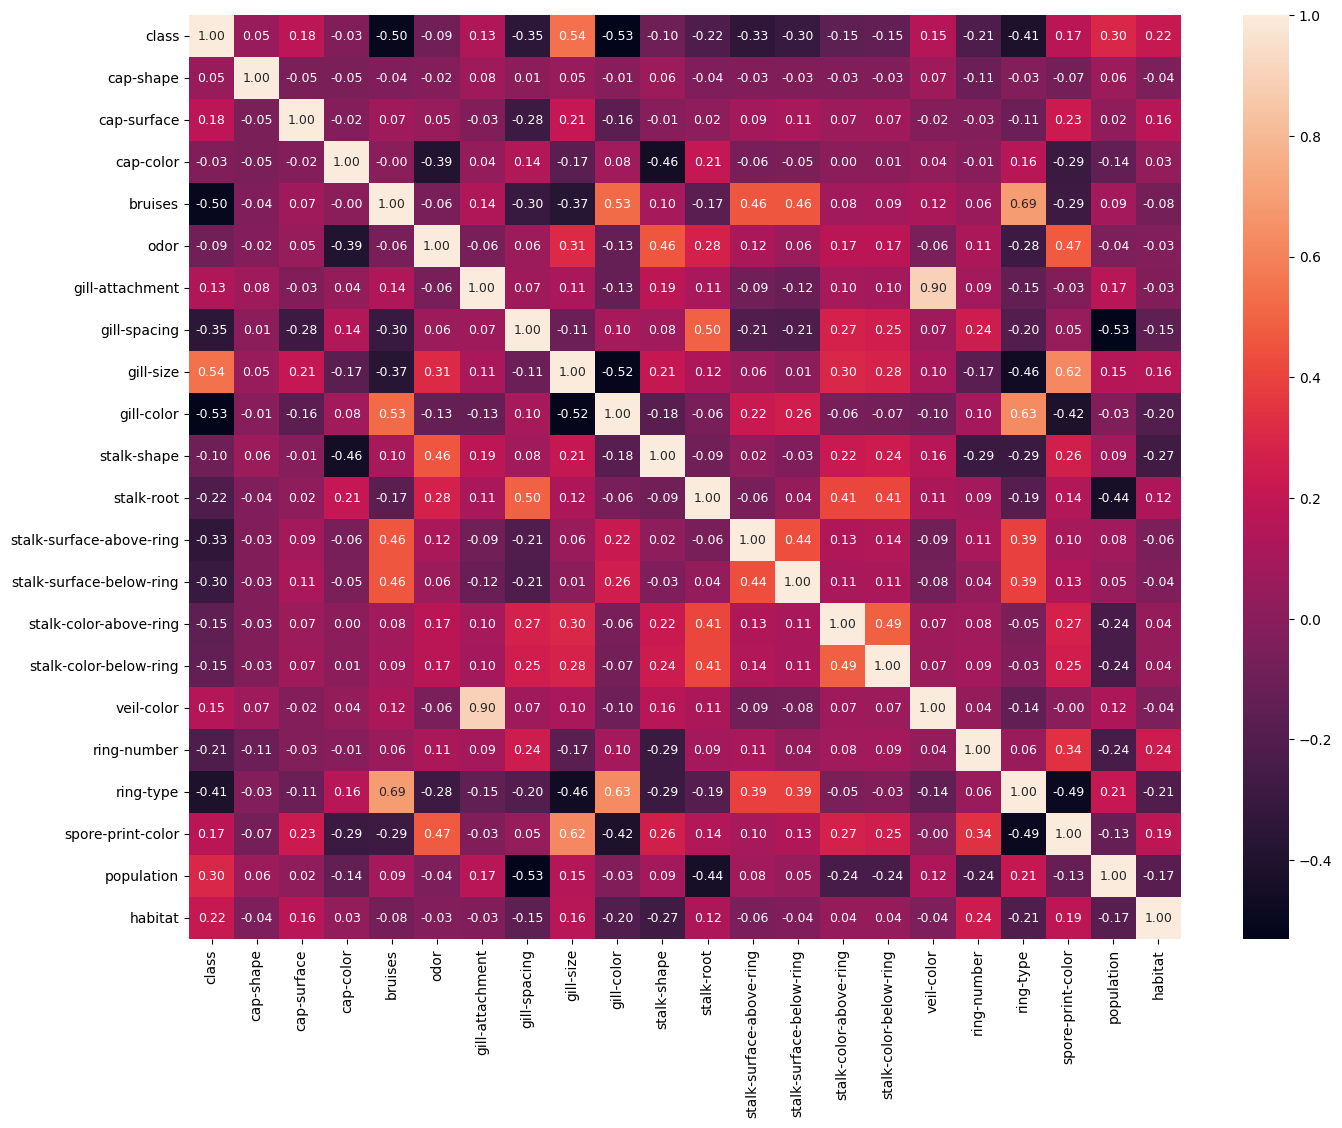

In [40]:
# correlation matrix:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'size':9})
plt.show()

<div style = 'border:3px solid brown;background-color:lightyellow;padding:10px'>
    <li> <span style = 'color:#F05B02'><b>In relation to target variable:</b></span></li>
    <li> gill-size is having <span style = 'color:#F05B02'><b>weak positive</b></span>
        linear correlationship.</li>
    <li> gill-color is having <span style = 'color:#F05B02'><b>high negetive</b></span>
        linear correlationship.</li>
    <li> gill-attachment is having <span style = 'color:#F05B02'><b>high</b></span>
        linear correlationship with veil-color.</li>
</div>

Explained Variance Ratio: [0.18229104 0.12317632 0.12022566 0.10118186 0.08106264 0.06209496
 0.04654403 0.04248934 0.03719398 0.0343194  0.02944341 0.02717206
 0.02438187 0.02210839 0.01937018 0.01459843 0.01041492 0.00882723
 0.00598576 0.00393967 0.00317885]


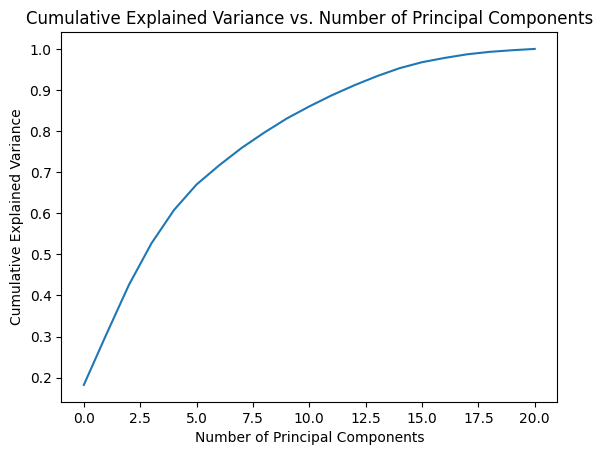

Explained Variance Ratio After Dimensionality Reduction:
[0.18229104 0.12317632 0.12022566 0.10118186 0.08106264 0.06209496
 0.04654403 0.04248934 0.03719398 0.0343194  0.02944341]


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Izdvajanje numeričkih atributa 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Isključivanje kolone 'class' iz numeričkih atributa
numerical_columns = numerical_columns[numerical_columns != 'class']

# Izdvajanje atributa bez 'class' kolone
X = df[numerical_columns]

# Normalizacija podataka
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Primena PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Prikazivanje explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Prikazivanje grafikona kumulativne explained variance
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Određivanje broja komponenti koje želimo zadržati (npr. 95% objašnjene varijanse)
desired_variance_ratio = 0.85
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

# Ponovna primena PCA sa odabranim brojem komponenti
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_normalized)

# Prikazivanje novih komponenti
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Prikazivanje objašnjene varijanse nakon smanjenja dimenzionalnosti
print("Explained Variance Ratio After Dimensionality Reduction:")
print(pca.explained_variance_ratio_)


In [42]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.289348,-1.795883,0.042230,0.226684,-1.633591,-0.919471,1.529615,0.710693,-0.406231,2.042809,0.656395
1,-1.678209,-1.024971,1.457185,-0.403244,-1.481150,-1.705678,0.904758,0.166151,-0.149208,-0.902051,-1.057298
2,-1.254312,-1.613505,1.327432,0.355503,-1.773909,-0.657458,-1.818100,0.098581,-0.493463,0.610033,-0.667672
3,0.065403,-1.844008,0.463099,0.269136,-2.302236,-1.596230,1.326469,0.780139,0.279082,1.641253,0.950550
4,2.053246,-1.392910,2.268484,-0.306049,1.641043,-0.225797,0.882903,1.316437,1.010717,-0.133684,-1.640079
...,...,...,...,...,...,...,...,...,...,...,...
8119,-2.826427,-0.409808,1.108447,6.794713,2.572960,-1.058358,0.353028,0.849295,-0.225860,0.118241,-0.040994
8120,-3.500784,0.041461,0.125640,8.737196,3.538383,-1.913582,1.641422,0.280063,-0.749175,-0.124436,1.645544
8121,-2.246705,-0.076790,0.930025,6.946078,2.227484,-1.173828,-0.296840,0.570564,-0.436505,0.114504,-0.359098
8122,3.351736,-0.253670,-1.515915,0.369354,-0.254341,-0.309126,-0.359900,-0.110655,0.289179,0.055134,0.948805


# <center><div style="font-family: 'Roboto', sans-serif;">🛠️ Model synthesis 🏗️</div></center>

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Feature selection :</span></h4></b>
</div>

In [43]:
X = df_pca
y =df['class']

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Train test split:</span></h4></b>
</div>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Decision tree classifier Algorithm :</span></h4></b>
</div>

accuracy score 0.995079950799508


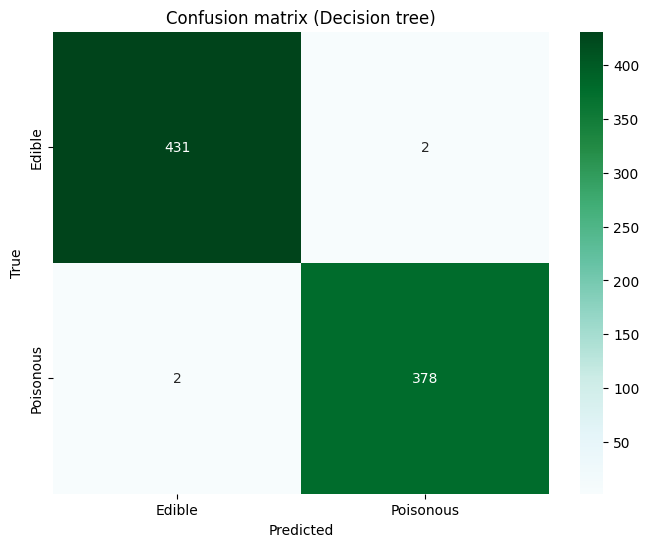


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       0.99      0.99      0.99       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



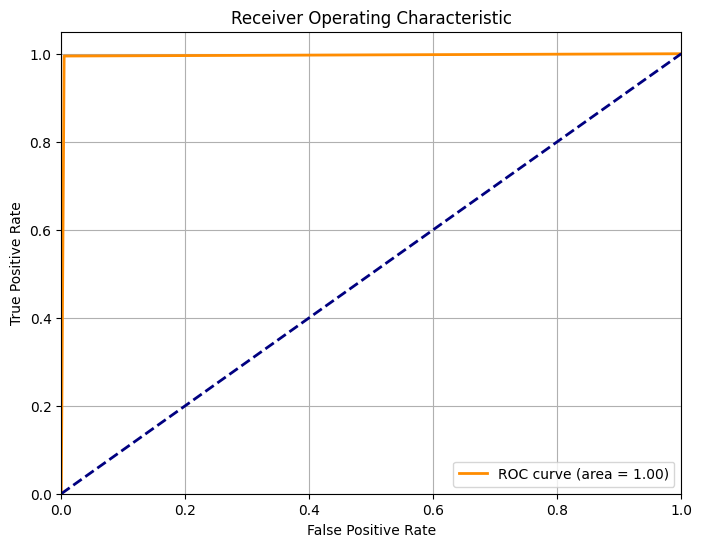

In [45]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred_tree = dec_tree.predict(X_test)

# creating instance for accuracy_score:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print('='*50)
print('accuracy score', accuracy_tree)
print('='*50)
# creating instance for confusion_matrix:
conf_matrix = confusion_matrix(y_test,y_pred_tree)

#create heatmap:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion matrix (Decision tree)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Set x-axis and y-axis labels
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])

plt.show()

# creating instance for classification_report:
classification_rep = classification_report(y_test,y_pred_tree)

print('='*50)
print('\nClassification Report:\n',classification_rep)
print('='*50)

# calculating ROC curve and AUC:
fpr, tpr, _ = roc_curve(y_test,dec_tree.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# To plot roc curve:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Ada Boost classifier Algorithm :</span></h4></b>
</div>

AdaBoost Model Accuracy: 0.985239852398524


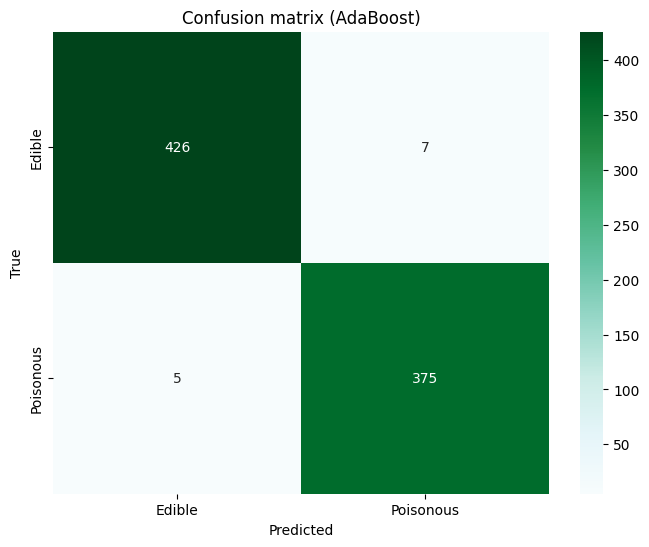


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       433
           1       0.98      0.99      0.98       380

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
weighted avg       0.99      0.99      0.99       813



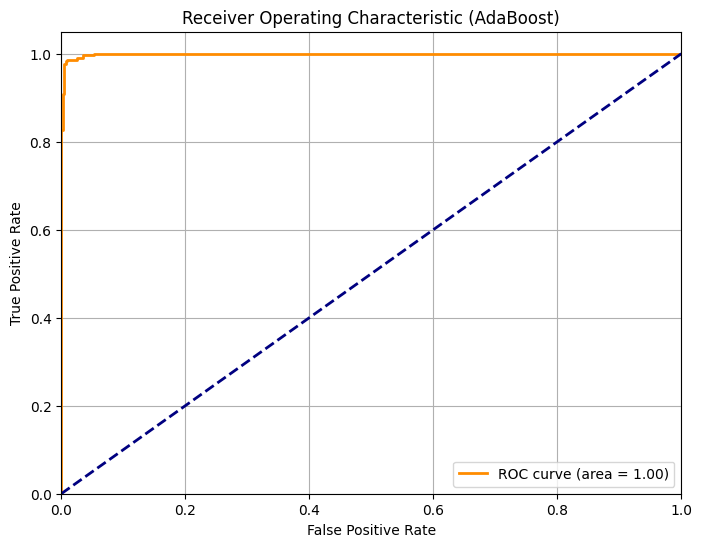

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Kreiranje instance za accuracy_score:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('='*50)
print('AdaBoost Model Accuracy:', accuracy_ada)
print('='*50)

# Kreiranje instance za confusion_matrix:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Kreiranje heatmap-a:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion matrix (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Postavljanje oznaka na x i y osi
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])

plt.show()


# Kreiranje instance za classification_report:
classification_rep_ada = classification_report(y_test, y_pred_ada)
print('='*50)
print('\nAdaBoost Classification Report:\n', classification_rep_ada)
print('='*50)

# Računanje ROC krive i AUC za AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_model.predict_proba(X_test)[:,1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Crtanje ROC krive:
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> XGBoost classifier Algorithm :</span></h4></b>
</div>

XGBoost Model Accuracy: 1.0


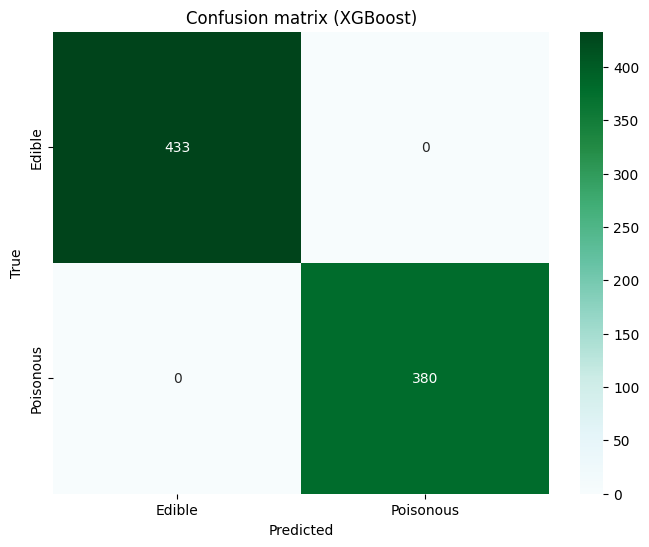


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



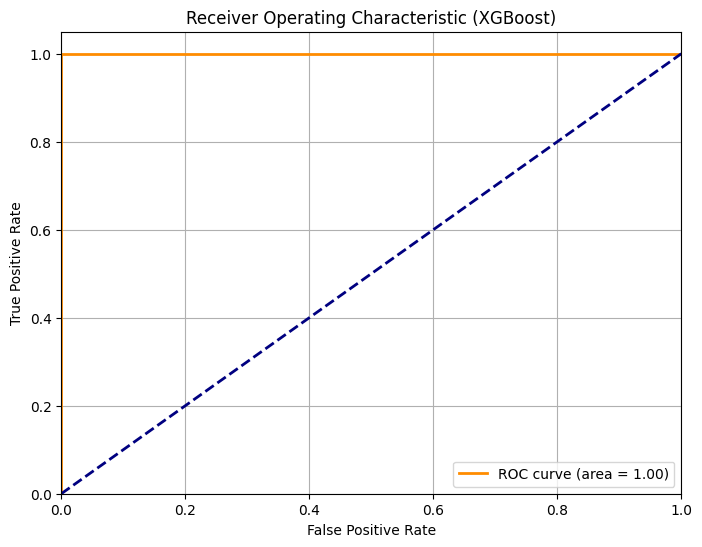

In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('='*50)
print('XGBoost Model Accuracy:', accuracy_xgb)
print('='*50)

# Kreiranje instance za confusion_matrix:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Kreiranje heatmap-a:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Postavljanje oznaka na x i y osi
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])

plt.show()


# Kreiranje instance za classification_report:
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print('='*50)
print('\nXGBoost Classification Report:\n', classification_rep_xgb)
print('='*50)
# Računanje ROC krive i AUC za XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Crtanje ROC krive:
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


<div style="border-radius:10px;border:#FFF722 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b><h4><span style='color:#85BB65'>|</span> <span style = 'color:#cf0a2c'> Optimizing hyperparameters:</span></h4></b>
</div>

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Inicijalizacija DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Definisanje opsega vrednosti hiperparametara koje želite testirati
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}


# Inicijalizacija GridSearchCV
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Pokretanje GridSearchCV na trening podacima
grid_search.fit(X_train, y_train)

# Najbolji model dobijen kroz GridSearchCV
best_dec_tree_model = grid_search.best_estimator_

# Prikazivanje najboljih parametara
print("Best Parameters:", grid_search.best_params_)

# Evaluacija najboljeg modela na test podacima
y_pred_grid_search = best_dec_tree_model.predict(X_test)

# Računanje tačnosti modela
accuracy_grid_search = accuracy_score(y_test, y_pred_grid_search)
print("Accuracy with Grid Search Optimizer (Decision Tree):", accuracy_grid_search)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with Grid Search Optimizer (Decision Tree): 0.996309963099631


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inicijalizacija AdaBoostClassifier
ada_model = AdaBoostClassifier()

# Definisanje opsega vrednosti hiperparametara koje želite testirati
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0,3],
}

# Inicijalizacija RandomizedSearchCV
random_search_ada = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Pokretanje RandomizedSearchCV na trening podacima
random_search_ada.fit(X_train, y_train)

# Najbolji model dobijen kroz RandomizedSearchCV
best_ada_model_rand = random_search_ada.best_estimator_

# Prikazivanje najboljih parametara
print("Best Parameters:", random_search_ada.best_params_)

# Evaluacija najboljeg modela na test podacima
y_pred_random_search_ada = best_ada_model_rand.predict(X_test)

# Računanje tačnosti modela
accuracy_random_search_ada = accuracy_score(y_test, y_pred_random_search_ada)
print("Accuracy with Randomized Search Optimizer (AdaBoost):", accuracy_random_search_ada)


Best Parameters: {'n_estimators': 300, 'learning_rate': 0.2}
Accuracy with Randomized Search Optimizer (AdaBoost): 0.9876998769987699


In [50]:
xgb_model = XGBClassifier()

# Definisanje opsega vrednosti hiperparametara koje želite testirati
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Najbolji model dobijen kroz GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Prikazivanje najboljih parametara
print("Best Parameters:", grid_search.best_params_)

# Evaluacija najboljeg modela na test podacima
y_pred_grid_search_xgb = best_xgb_model.predict(X_test)

# Računanje tačnosti modela
accuracy_grid_search_xgb = accuracy_score(y_test, y_pred_grid_search_xgb)
print("Accuracy with Grid Search Optimizer (XGBoost):", accuracy_grid_search_xgb)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy with Grid Search Optimizer (XGBoost): 1.0
